_________

In [1]:
NAME = 'Work-places'

In [2]:
import numpy as np
import random
from math import sqrt
import nepzeb

In [3]:
n = 1000

mu = 4 
t = 0

ni = n//2

simulation_days = 5
T = simulation_days * 2

ar = sorted(np.random.exponential(1/mu,10000))[20]
br = sorted(np.random.exponential(1/mu,10000))[200]


#probability of survival
pr = 0.6

#main matix's size is lxl
l = 1000

#min distance
c = 10

ns = ni
nh = n - ns
nd = 0
nu = 0
nr = 0
nu = 0



In [4]:
#number of workplace
nwp = 5

def FWS(l):
    return(np.random.randint(l//100, l//50))


#list of size of each Work-palce and number of workers
ws = [FWS(l) for i in range(nwp)]

#inser an item that sum of all items 
ws.insert(0, 0.5 * sum(ws))


<div dir=rtl>
    به اندازه مجموع کل آیتم‌ها به اول ws
    اضافه می‌کنیم برای ارضای ۱/۳ جامعه بدون شغل.
       تابع زیر را جلوتر برای تقسیم افراد به محل کار‌ها با احتمال اندازه هر محل کار استفاده می‌کنیم.
    
</div>

In [5]:
ws_p = []
for k in range(len(ws)):
    ws_p.append(ws[k]/sum(ws))
ws_p

[0.3333333333333333,
 0.14728682170542637,
 0.13178294573643412,
 0.13953488372093023,
 0.10852713178294573,
 0.13953488372093023]

______________

<div dir=rtl >
    تعداد مرکز خرید‌ها را مشخص می‌کنیم، برای هر مرکز خرید اندازه هر ضلع مربع آن به صورت تصادفی با کورلیشن به اندازه ماتریس اصلی تولید می‌کنیم.
    </div>

In [6]:
#measure of shopping center

number_of_shopping_center = 4
lsc = [random.randint(l//100, l//10) for i in range(number_of_shopping_center)]
ug = 0.9
ag = 1
bg = 20 * ag


In [7]:
lsc

[45, 41, 83, 41]

_________

<div dir=rtl>
    هر کدام از افراد را به تصادف در نقطه‌ای ثابت در ماتریس جا می‌دهیم.
    موقعیت هر کس را به صورت
</div>
    ((x,y),([in the which shopping center / main matrix],[which work-place]))

<div dir=rtl>
    تعریف می‌کنیم، در شروع همه در ماتریس اصلی حضور دارند.
   
</div>

In [8]:
def random_per():
    N = []
    while len(N) < n:
        zz = (random.randint(1,l), random.randint(1,l))
        if not(zz) in N:
            N.append((zz,(0,np.random.choice(nwp+1, p = ws_p))))
    return(N)
N = random_per()

In [9]:
N[:5]

[((611, 147), (0, 4)),
 ((61, 742), (0, 4)),
 ((521, 153), (0, 3)),
 ((366, 245), (0, 5)),
 ((247, 652), (0, 0))]

______

<div dir=rtl>
    ساعت کاری هر محل کار را به صورت تصادفی ایجاد می‌کنیم.
</div>

In [10]:
ab = 0
bb = 0.1

ae = 0.9
be = 1

#Work-places working hours
WPH = [(np.random.uniform(ab,bb),np.random.uniform(ae,be)) for i in range(nwp)]

In [11]:
WPH

[(0.07296886329760148, 0.9139261562916758),
 (0.06034458650870777, 0.9281184486739081),
 (0.07568662033951212, 0.962056131887711),
 (0.025080090626955057, 0.9800167891060753),
 (0.015720349348102746, 0.937469147890675)]

__________

<div dir=rtl>
    تابع زیر در زمان t
    چک می‌کند محل کار n
    آیا در ساعت کاری است یا نه.
    
</div>

In [12]:
# a Function that return TRUE if workpalce n is active
def work(t,n):
    
    #check is he/she is jobless
    if n == 0:
        return(False)
    
    elif (WPH[n-1][0] <= (t% (T/simulation_days))) and (WPH[n-1][1]) >= (t% (T/simulation_days)):
        return(True)
    else:
        return(False)

_______________

<div dir=rtl>
    توابع زیر توابع معرفی شده در مثال سه هستند که به صورت عمومی برای نقطه داده شده و لیستی که به آن داده می‌شود با کسانی که فاصله اقلیدسی کمتر مساوی c
    دارند، نرخ را محاسبه می‌کند.
    لازم به ذکر است نرم‌های دیگر مانند فاصله منهتن هم مناسب مدل هستند.
</div>

In [13]:
def f_1(node,X):
    x = node[0][0]
    y = node[0][1]
    u = 0
    
    for each_cell in range(len(X)):
        (a,b) = X[each_cell]
        dis = sqrt((x - a)** 2 + (y - b)**2)
        if  dis <= c:
            #f(i,j)= mu * \delta_{d(i,j)} 
            u += mu

    return(u)
    

In [14]:
def f_2(node,X):
    x = node[0][0]
    y = node[0][1]
    u = 0
    
    for each_cell in range(len(X)):
        (a,b) = X[each_cell]
        dis = sqrt((x - a)** 2 + (y - b)**2)
        if  dis <= c:
            #f(i,j)= mu /(1 + d(i,j)) * \delta_{d(i,j)} 
            u += mu / 1+ dis
    return(u)


________

<div dir=rtl>
    لیستی خالی برای کسانی که در مرکز خرید هستند ایجاد می‌کنیم که با توجه به زمان پایان خرید به ماتریس اصلی بر گردند.
</div>

In [15]:
people_in_shopping_center = []

<div dir=rtl>
    باتوجه به اینکه نرخ به مرکز خرید رفتن
    ug
    و زمان تصادفی یکنواختی در آنجا می‌مانند تابعی تعریف کردیم که 
    اول زمان را تخمین می‌زند و اگر زمان از اولین اتفاق‌ها کمتر بود
    به تعداد ممکنه افراد را به مرکز‌خرید‌ها جا به جا می‌کند.
    
</div>


In [16]:
def go_shop(t,x,y):
    
    go_shop = []
    for i in range(n):
        if N[i][1][0] == 0:
            go_shop.append(np.random.exponential(ug))
        else:
            go_shop.append(float('inf'))
            
        if sorted(go_shop)[0] < min(x,y):
            for index in range(len(go_shop)):
                
                ss = random.randint(1,number_of_shopping_center)
                N[index] = ((N[index][0][0], N[index][0][1]),(ss, N[index][1][1]))
                
                c = np.random.uniform(ag,bg)
                people_in_shopping_center.append((t + c , index))

    

________________

<div dir=rtl>
    در لحظه
    t
    اگر زمان حضور افراد در مراکز خرید به پایان رسیده بود، آنها را به ماتریس اولیه بر می‌گرداند.
</div>

In [17]:
def back_shop():
    
    count = 0
    if len(people_in_shopping_center) > 0 :
        
        if sorted(people_in_shopping_center)[0][0] <= t:

            for i in range(len(people_in_shopping_center)):

                if people_in_shopping_center[i][0] <= t:
                    count += 1

                    index = people_in_shopping_center[i][1]
                    time = people_in_shopping_center[i][0]

                    N[index] = ((N[index][0][0],N[index][0][1]),(0,N[index][1][1]))

    return(count)
                

_____


<div dir=rtl>
    لیستی به تعداد نفرات جامعه ایجاد می‌کنیم که به تصادف  افراد سالم و مریض وضعیت آن‌ها مشخص شده است.
</div>


In [18]:
society = ['sick' for i in range(int(ns))] + ['healthy' for j in range(int(nh))]
random.shuffle(society)


<div dir=rtl>
    لیستی به تعداد افراد جامعه صفر تولید می‌کنیم، اگر فردی یکبار بهبود پیدا کرد خانه متعلق به اون به ۱ تغییر می‌کند.
    برای محاسبه تعداد افرادی یونیک بهبود یافته استفاده می‌کنیم
</div>


In [19]:
recoverd = np.zeros(n)


<div dir=rtl>
    لیست خالی برای نگهداری زمان پایان هر فردی که در نقاهت به سر می‌برد ایجاد می‌کنیم.
</div>


In [20]:
tu_list = []
#format of elements
#(t,((),()))

__________

<div dir=rtl>
    دو تابع اصلی در این شبیه سازی که فرآیند اصلی را انجام می‌دهند
    .
    با توجه به سوال سه که سیگما را برای افراد مریض و در دوران نقاهت تعریف می‌کند.
    این تابع برای هر فرد با توجه به موقعیتی که دارد، یعنی در کدام مرکز خرید و یا کدام محل کار و یا در ماتریس اصلی لیستی از همسایه‌های
    مریض و یا در دوران نقاهت می‌دهد.
</div>

In [21]:
def NS(node):

    NS = []

    #He/She is at work
    if work(t,node[1][1]):
        for person in range(n):
            if society[person] == 'sick':
                if N[person][1][1] == node[1][1]:
                    
                    ll = (np.random.randint(1,ws[node[1][1]-1]),np.random.randint(1, ws[node[1][1]-1]))
                    NS.append(ll)


    #He/She is in the main Matrix
    elif node[1][0] == 0:
        for person in range(n):
            if society[person] == 'sick':
                NS.append(N[person][0])
                

        
    #He/She is in the shopping Centers
    else:
        which = node[1][0]
        for person in range(n):
            if society[person] == 'sick':
                if N[person][1][0] == which:
                    NS.append((np.random.randint(1,lsc[which-1]),np.random.randint(1,lsc[which-1])))
    
                              
    return(list(NS))

In [22]:
def NS_NU():
  
    NS = []


    #He/She is in the main Matrix
    if node[1] == 0:
        for person in range(n):
            if society[person] == 'sick' and not(work(t, N[person][1][1])) and (N[person][1][0] == 0):
                NS.append(N[person][0])
                

        
    #He/She is in the shopping Centers
    else:
        which = node[1][0]
        for person in range(n):
            if society[person] == 'sick':
                if N[person][1][0] == which:
                    NS.append((np.random.randint(1,lsc[1,which-1]),np.random.randint(1,lsc[which-1])))
    

    NU = []
    
    #(t,((),()))
    wh = node[1][1]
    #He/she is at work
    if work(t,wh):
        for person in range(len(tu_list)):
            if tu_list[person][1][1][1] == wh:
                    ll = (np.random.randint(1,ws[node[1][1]-1]),np.random.randint(1, ws[node[1][1]-1]))
                    NU.append(ll)
    
    
    #He/She is in the main matrix
    elif node[1][0] == 0:
        for person in range(len(tu_list)):
            if tu_list[person][1][1][0] == 0:
                NU.append(tu_list[person[1]])
                
    
    #He/She is in the Shoping Centers
    else:
        wh = node[1][0]
        for person in range(len(tu_list)):
            if tu_list[person][1][1][0] == wh:
                NU.append((np.random.randint(lsc[wh-1]),np.random.randint(lsc[wh-1])))
                
    
    
    
    return(list(NU+NS))

________

<div dir=rtl>
   زمان وقوع اولین مریضی و اینکه کدام فرد را تولید می‌کنیم، در صورتی که زمان قبل از بهبود فردی دیگر رخ دهد، تابع اصلی آن را اجرا می کنیم.
    در این تابع بر خلاف خلاصه پروژه μ
    به عنوان میانگین ( و نه نرخ)
    متغیر پواسون فرض شده است.
    در صورت نیاز
    MU
    را به 
    1/MU
    تغییر دهید.
    در صورت صفر بودن MU
    در این شرایط هم از شرط خطی‌ای استفاده شده که از ارور تقسیم بر صفر جلوگیری شود.
    
</div>

In [23]:
#return time and index of person who get sick

def NewCase_occur():
    
    fall_ill_chance = []
    for every_person in range(len(society)):
        if (society[every_person] == 'healthy'):

            #compute rate of Falling ill
            
            MU = f_1(N[every_person], NS(N[every_person]))
            fall_ill_chance.append(np.random.exponential(1/MU) if MU else float('inf'))

        
        else:
            fall_ill_chance.append(float('inf'))

    return(min(fall_ill_chance),fall_ill_chance.index(min(fall_ill_chance)))


In [24]:
#how the inline if work
print(np.random.exponential(1/0) if 0 else float('inf'))

inf


In [25]:
def NewCase(tt, index):
    global t
    global ns
    global nh
    
    t += tt
    ns += 1
    nh -= 1
    
    society[index] = 'sick'


___________

<div dir=rtl>
    اتفاق دوم هم همانند اول ایجاد می‌کنیم، در صورتی که زمان رخداد کمتر از اتفاق اول باشد،
    تابع اصلی اتفاق اول را اجرا می‌کنیم.
    با توجه به شرط سوال اول که امکان مریض شدن  دوباره افراد ممکن/ناممکن است.
    تابع اصلی اتفاق دوم را به دو صورت نوشته شده است. در صورت تمایل از هرکدام می‌شود، استفاده کرد.
    
</div>

In [26]:
#getting better or dead
def tr_occur():
    
    vaziat_moshakhas_beshe = []
    for ill in range(len(society)):
        if society[ill] == 'sick':
            #vaziat_moshakhas_beshe.append(np.random.exponential(1/mu))
            vaziat_moshakhas_beshe.append(np.random.uniform(ar,br))

        else:
            vaziat_moshakhas_beshe.append(float('inf'))
    return(min(vaziat_moshakhas_beshe),vaziat_moshakhas_beshe.index(min(vaziat_moshakhas_beshe)))

In [27]:
def tr_a(tt,index):
    global nd
    
    global nh
    global nr
    global nu

    global ns
    
    global t
    
    t += tt
    
    if random.random() < pr:
        
        nh += 1
        nr += 1
        nu += 1
        ns -= 1
        
        tu_list.append( ((t+(np.random.uniform(0.1,1))),N[index]) )

        society[index] = 'recoverd'
    else:
        
        nd += 1
        ns -= 1
        society[index] = 'dead'

In [28]:
def tr(tt,index):
    global nd
    
    global nh
    global nr
    global nu

    global ns
    
    global t
    
    t += tt
    
    if random.random() < pr:
        
        nh += 1
        nr += 1
        nu += 1
        ns -= 1
        
        tu_list.append( ((t+(np.random.uniform(0.1,1))),N[index]) )

        society[index] = 'healthy'
        recoverd[index] = 1
    else:
        
        nd += 1
        ns -= 1
        society[index] = 'dead'

________

In [29]:
fileName = NAME +'number: {}'.format(nwp) +'-n:{},ni:{},mu:{},ar:{},br:{},pr:{}'.format(n,ni,mu,ar,br,pr)
f = open('{}.csv'.format(fileName), 'w')
f.write('Event,Time,Healthy People,Ill People,Recoverd people,RIP,\n')

58

______________

In [31]:
while (t < T):
    
    X = NewCase_occur()
    Y = tr_occur()
    
        #Check if both are inf

    if X[0] == Y[0] == float('inf'):
               
        break
        
    #if someone wants to back from shopping
    q = back_shop()
    people_in_shopping_center = people_in_shopping_center[q:]
    
    #check if one or more convalescence time have been over
    tu_list.sort()
    if (len(tu_list) > 0):
        if (tu_list[0][0] <= t):
            count = 0
            for i in range(len(tu_list)):
                if tu_list[i][0] <= t:
                    count += 1
            nu -= count

            tu_list = tu_list[count:]
            
    
    #If anyone wants go to shopping
    go_shop(t,X[0],Y[0])
    
  
        
        
    if X[0] <= Y[0]:
        NewCase(X[0],X[1])
        f.write('[sick],{},{},{},{},{}, \n'.format(t,nh,ns,int(sum(recoverd)),nd))
        
    if Y[0] < X[0]:
        tr(Y[0], Y[1])
        f.write('[heal/dead],{},{},{},{},{}, \n'.format(t,nh,ns,int(sum(recoverd)),nd))
        
f.close()

In [32]:
nh,nd,ns

(804, 196, 0)

In [33]:
t

0.3907519914254691

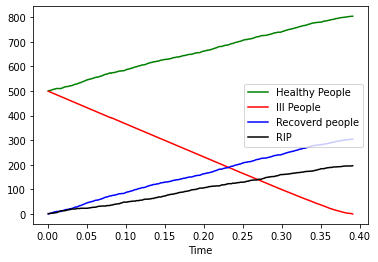

In [34]:
nepzeb.plotter('{}.csv'.format(fileName))